In [1]:
import tensorflow as tf 
import cv2
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
img_array = cv2.imread("train(1)\closed_eyes\s0001_00078_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

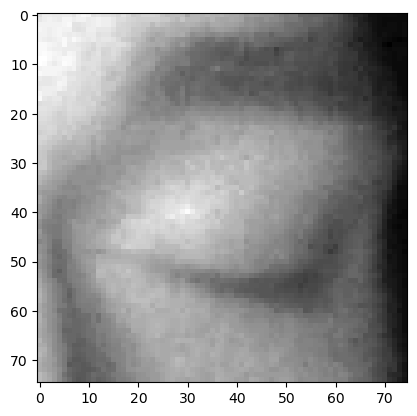

In [3]:
plt.imshow(img_array, cmap = "gray")

In [4]:
img_array.shape

(75, 75)

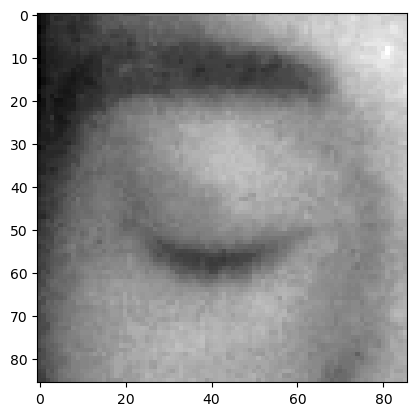

In [5]:
dataDirect = "train(1)/"
classes = ["closed_eyes", "open_eyes"]
for category in classes: 
    path = os.path.join(dataDirect, category)
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break 
    break

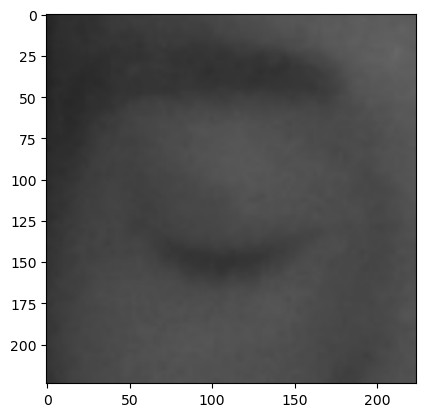

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [7]:
#read all imgs and convert to array for data and labels 

In [8]:
trainData = []

def create_trainData(): 
    for category in classes: 
        path = os.path.join(dataDirect, category)
        class_num = classes.index(category)
        for img in os.listdir(path): 
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                trainData.append([new_array, class_num])
            except Exception as e: 
                pass

In [9]:
create_trainData()

In [10]:
print(len(trainData))

1725


In [11]:
import random
random.shuffle(trainData)

In [12]:
X = []
y = []

for features,label in trainData: 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(1725, 224, 224, 3)

In [14]:
#normalize the data 
X = X/255.0;

In [15]:
Y = np.array(y)

In [16]:
import pickle 
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)


deep learning model for training - Training Learning

In [18]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

transfer learning

In [ ]:
base_input = model.layers[0].input #input

In [ ]:
base_output = model.layers[-4].output #output

In [23]:
flatLayer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flatLayer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

settings for binary classification

In [26]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
new_model.fit(X, Y, epochs = 5, validation_split = 0.05) #training

Epoch 1/5


52/52 [==============================] - 147s 2s/step - loss: 0.1696 - accuracy: 0.9444 - val_loss: 7.0326 - val_accuracy: 0.4483
Epoch 2/5
52/52 [==============================] - 175s 3s/step - loss: 0.0555 - accuracy: 0.9792 - val_loss: 4.3076 - val_accuracy: 0.4483
Epoch 3/5
52/52 [==============================] - 160s 3s/step - loss: 0.0271 - accuracy: 0.9896 - val_loss: 0.7760 - val_accuracy: 0.8391
Epoch 4/5
52/52 [==============================] - 165s 3s/step - loss: 0.0688 - accuracy: 0.9707 - val_loss: 10.4073 - val_accuracy: 0.5632
Epoch 5/5
52/52 [==============================] - 151s 3s/step - loss: 0.0758 - accuracy: 0.9719 - val_loss: 0.2046 - val_accuracy: 0.9195


In [28]:
new_model.save("modelNo3")

INFO:tensorflow:Assets written to: modelNo3\assets


INFO:tensorflow:Assets written to: modelNo3\assets


In [29]:
new_model = tf.keras.models.load_model("modelNo3")

checking network for predictions

In [30]:
img_array = cv2.imread("throwout\s0002_00719_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [31]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [32]:
X_input.shape

(1, 224, 224, 3)

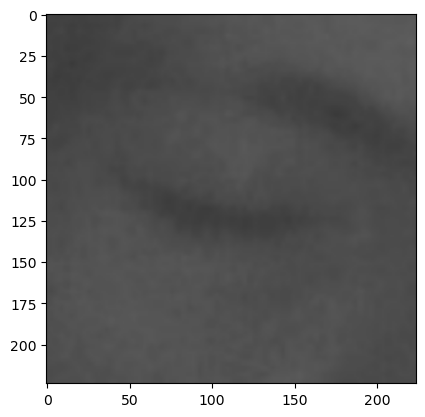

In [33]:
plt.imshow(new_array)

In [34]:
X_input = X_input/255.0

In [35]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 3s 3s/step


In [36]:
prediction

array([[0.8651865]], dtype=float32)

check other images

In [37]:
img = cv2.imread("throwout\sad.jpg")

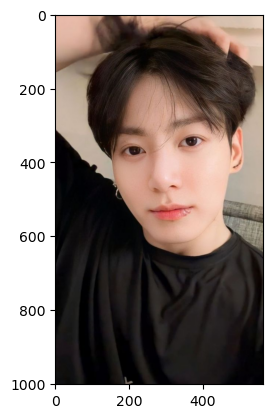

In [38]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [42]:
eyes = eyeCascade.detectMultiScale(gray, 1.1,4)

In [43]:
for (x, y, w, h) in eyes: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

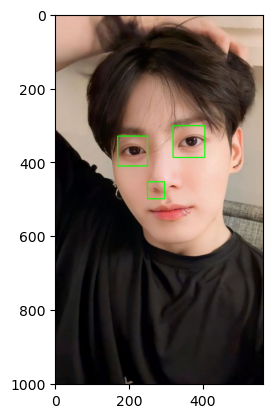

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cropping the eye image

In [45]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0: 
        print("No eyes detected")
    else: 
        for (ex, ey, ew, eh) in eyess: 
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

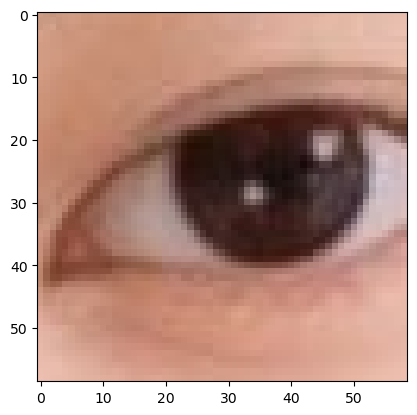

In [46]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [47]:
eyes_roi.shape

(59, 59, 3)

In [48]:
fix_img = cv2.resize(eyes_roi, (224, 224))
fix_img = np.expand_dims(fix_img, axis = 0)
fix_img = fix_img/255.0

In [49]:
fix_img.shape

(1, 224, 224, 3)

In [50]:
new_model.predict(fix_img)

1/1 [==============================] - 0s 190ms/step


array([[1.]], dtype=float32)

real time video detection

detect either eyes are closed or open

In [51]:
import winsound
frequency = 2500
duration = 1000

import numpy as np 
import cv2 
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#check if webcam working properly
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened(): 
    raise IOError("Cannot open webcam")
counter = 0
while True: 
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes: 
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = frame[y: y+h, x: x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray) #check if there are more than a pair of eyes
        if len(eyess) == 0: 
            print("No eyes detected")
        else: 
            for (ex, ey, ew, eh) in eyess: 
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

    fix_img = cv2.resize(eyes_roi, (224, 224))
    fix_img = np.expand_dims(fix_img, axis = 0)
    fix_img = fix_img/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    prediction = new_model.predict(fix_img)
    if (prediction >= 0.505): 
        status = "Open Eyes"
        cv2.putText(frame, 
                    status, 
                    (150, 150), 
                    font, 3, 
                    (0, 255, 0), 
                    2, 
                    cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75

        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, 'Awake', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else: 
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, 
                    status, 
                    (150, 150), 
                    font, 3, 
                    (0, 255, 0), 
                    2, 
                    cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter > 5: 
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Sleepy Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            winsound.Beep(frequency, duration)
            counter = 0

   
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'): 
        break 

cap.release()
cv2.destroyAllwindows()

1/1 [==============================] - 0s 103ms/step


KeyboardInterrupt: 